## Installation YOLOv8

In [2]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


## check CMD

In [1]:
!pwd

/content


## TASK - DETECTION

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt source='images/cats.jpg'

100% 6.23M/6.23M [00:00<00:00, 163MB/s]
Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 /content/images/cats.jpg: 512x640 5 cats, 84.3ms
Speed: 14.9ms preprocess, 84.3ms inference, 38.9ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict


# TASK - SEGMENTATION

In [ ]:
!yolo task=segment mode=predict model=yolov8n-seg.pt source='images/cats.jpg'

100% 6.73M/6.73M [00:00<00:00, 43.2MB/s]
Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients

image 1/1 /content/images/cats.jpg: 512x640 4 cats, 132.1ms
Speed: 4.2ms preprocess, 132.1ms inference, 3.1ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/segment/predict


## Python script

In [ ]:
from ultralytics import YOLO

# load a segmentation model
model = YOLO("yolov8n-seg.pt")
model.predict(source="images/cats.jpg")

#TASK - CLASIFICATION

In [ ]:
!yolo task=classify mode=predict model=yolov8n-cls.pt source='images/cats.jpg'

100% 5.28M/5.28M [00:00<00:00, 14.5MB/s]
Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients

100% 755k/755k [00:00<00:00, 41.7MB/s]
image 1/1 /content/images/cats.jpg: 224x224 tabby 0.75, tiger_cat 0.16, Egyptian_cat 0.04, tiger 0.01, lynx 0.01, 3.4ms
Speed: 29.4ms preprocess, 3.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict


# MAIN - SKIN CANCER DETECTION

In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

## Custom trining

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# change directory
%cd /content/drive/MyDrive/Colab Notebooks/YOLOv8

/content/drive/MyDrive/Colab Notebooks/YOLOv8


In [6]:
!ls

data  data.yaml  YOLOv8_SkinCancerDetection.ipynb


In [7]:
%cd /content/drive/MyDrive/Colab Notebooks/YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=50 imgsz=320 plots=True

/content/drive/MyDrive/Colab Notebooks/YOLOv8
100% 21.5M/21.5M [00:00<00:00, 50.2MB/s]
Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, for

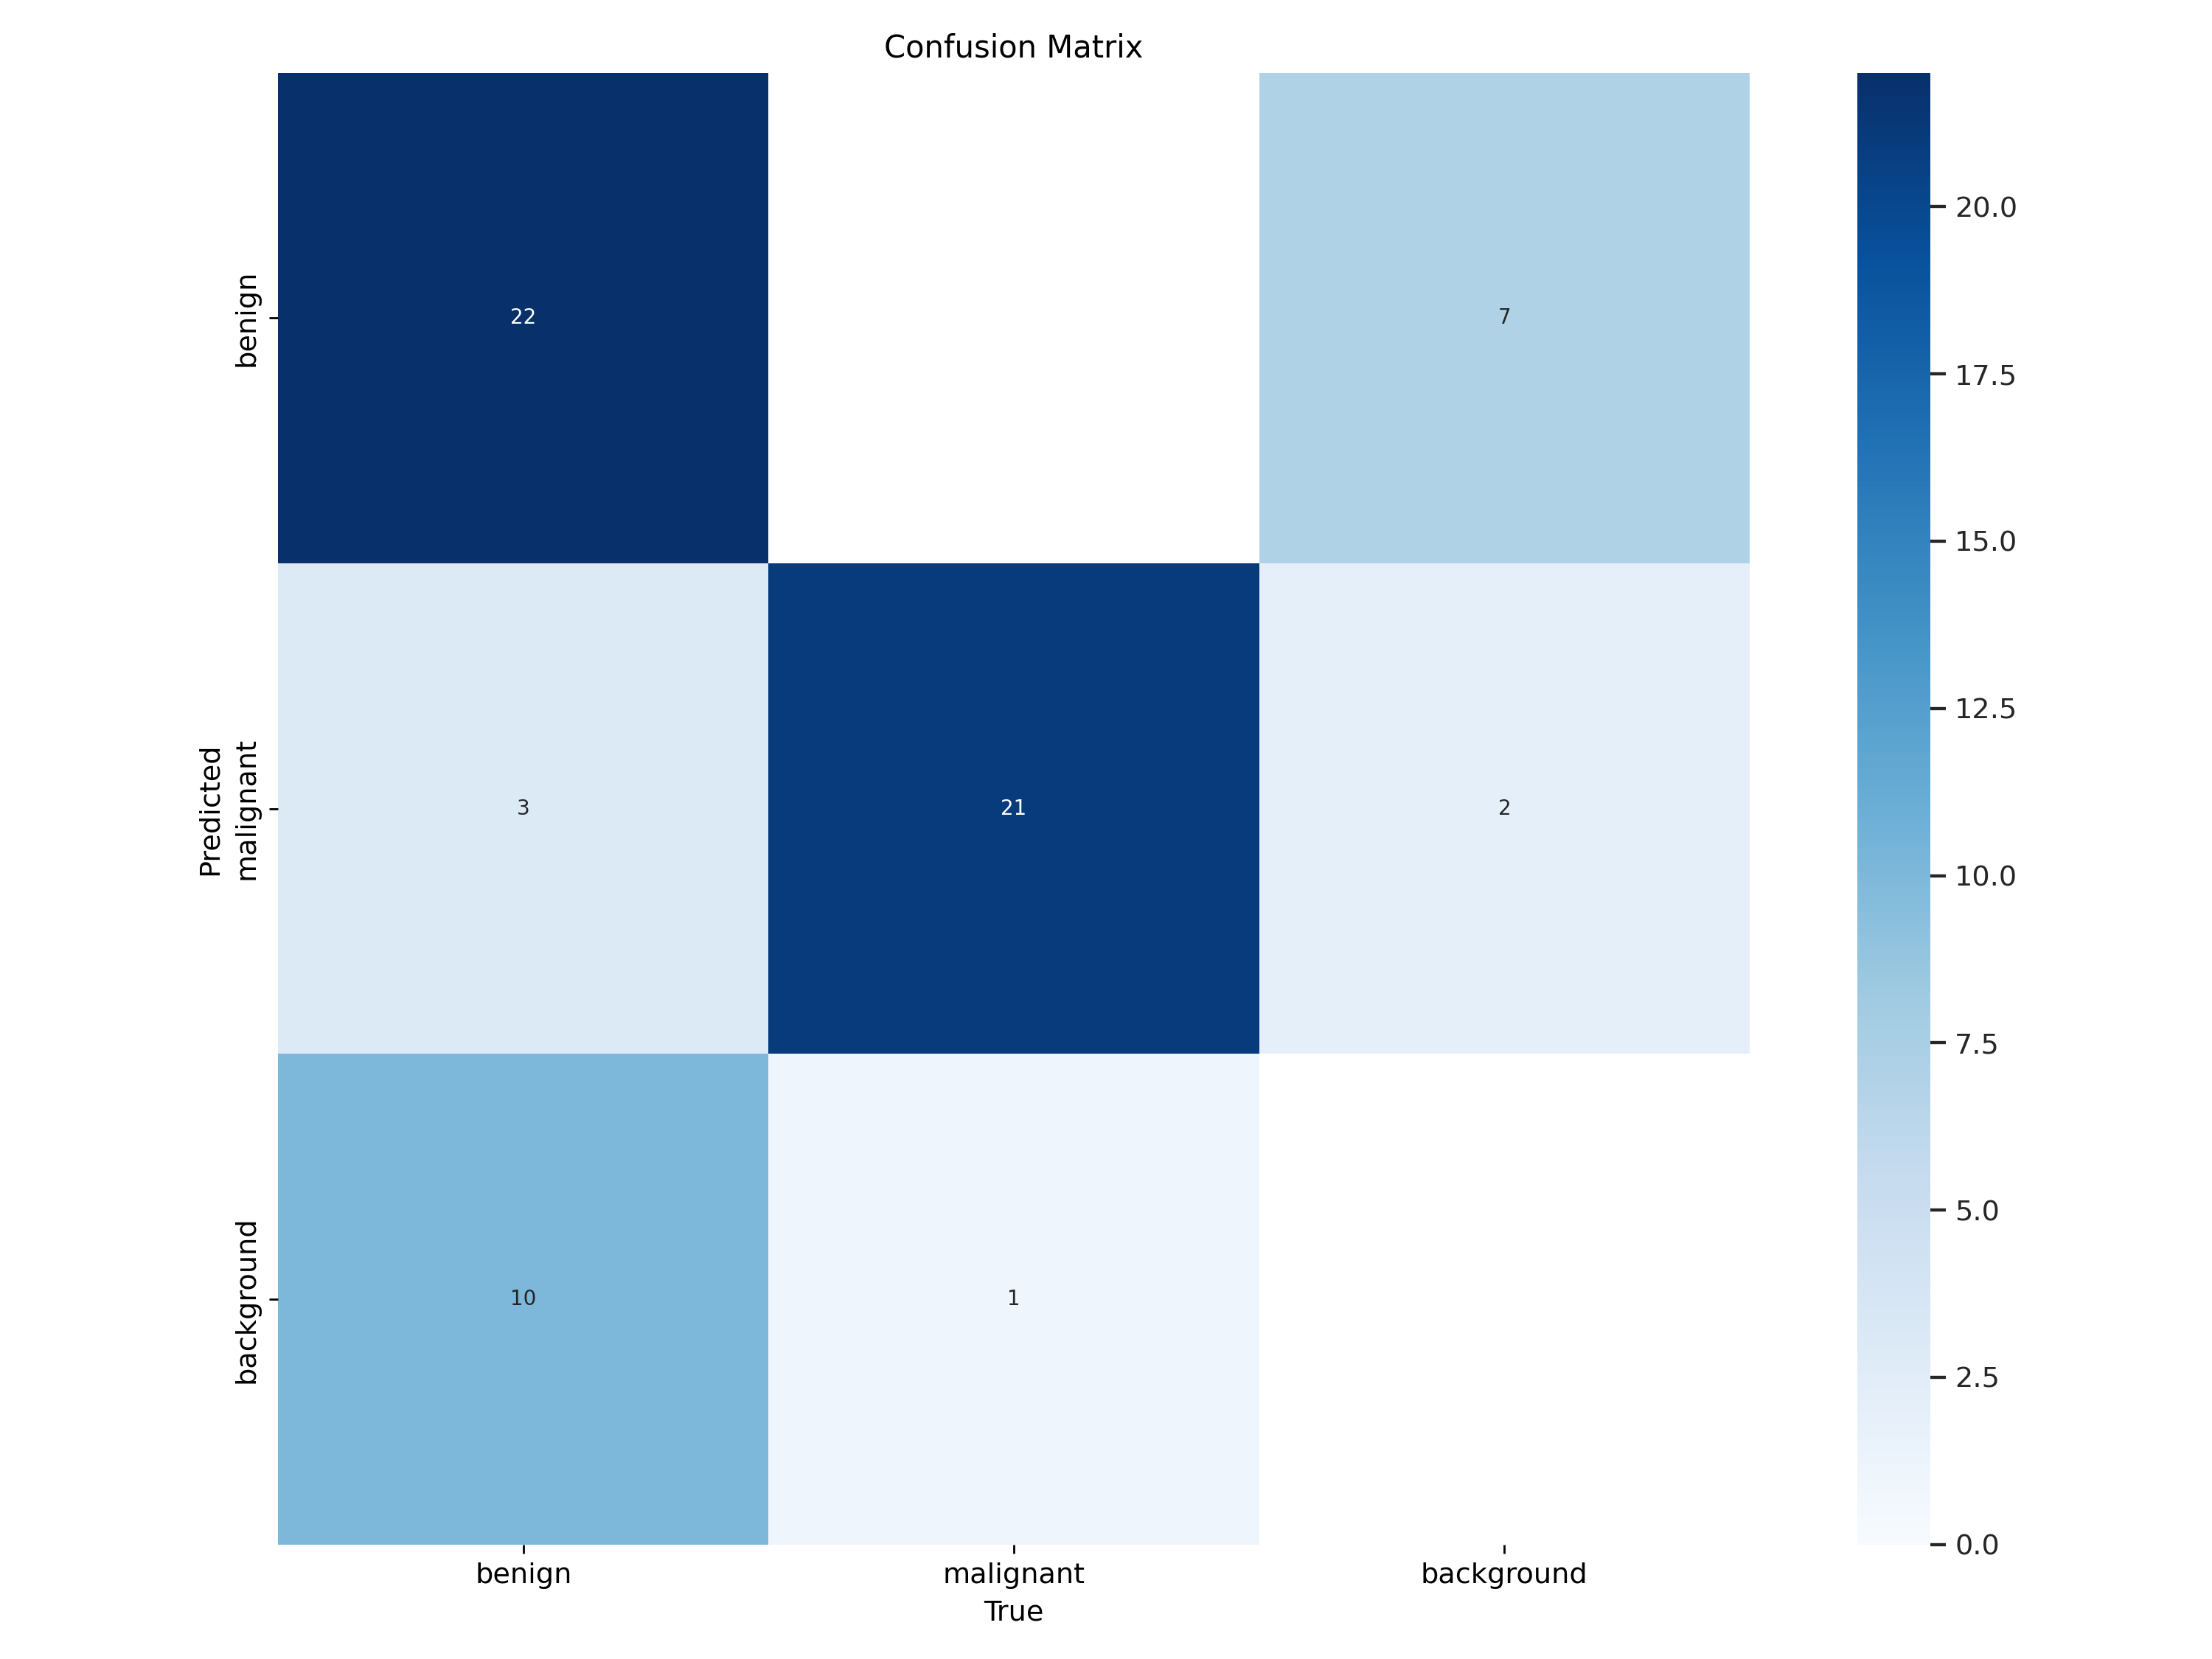

In [9]:
Image(filename='runs/detect/train/confusion_matrix.png',width=600)

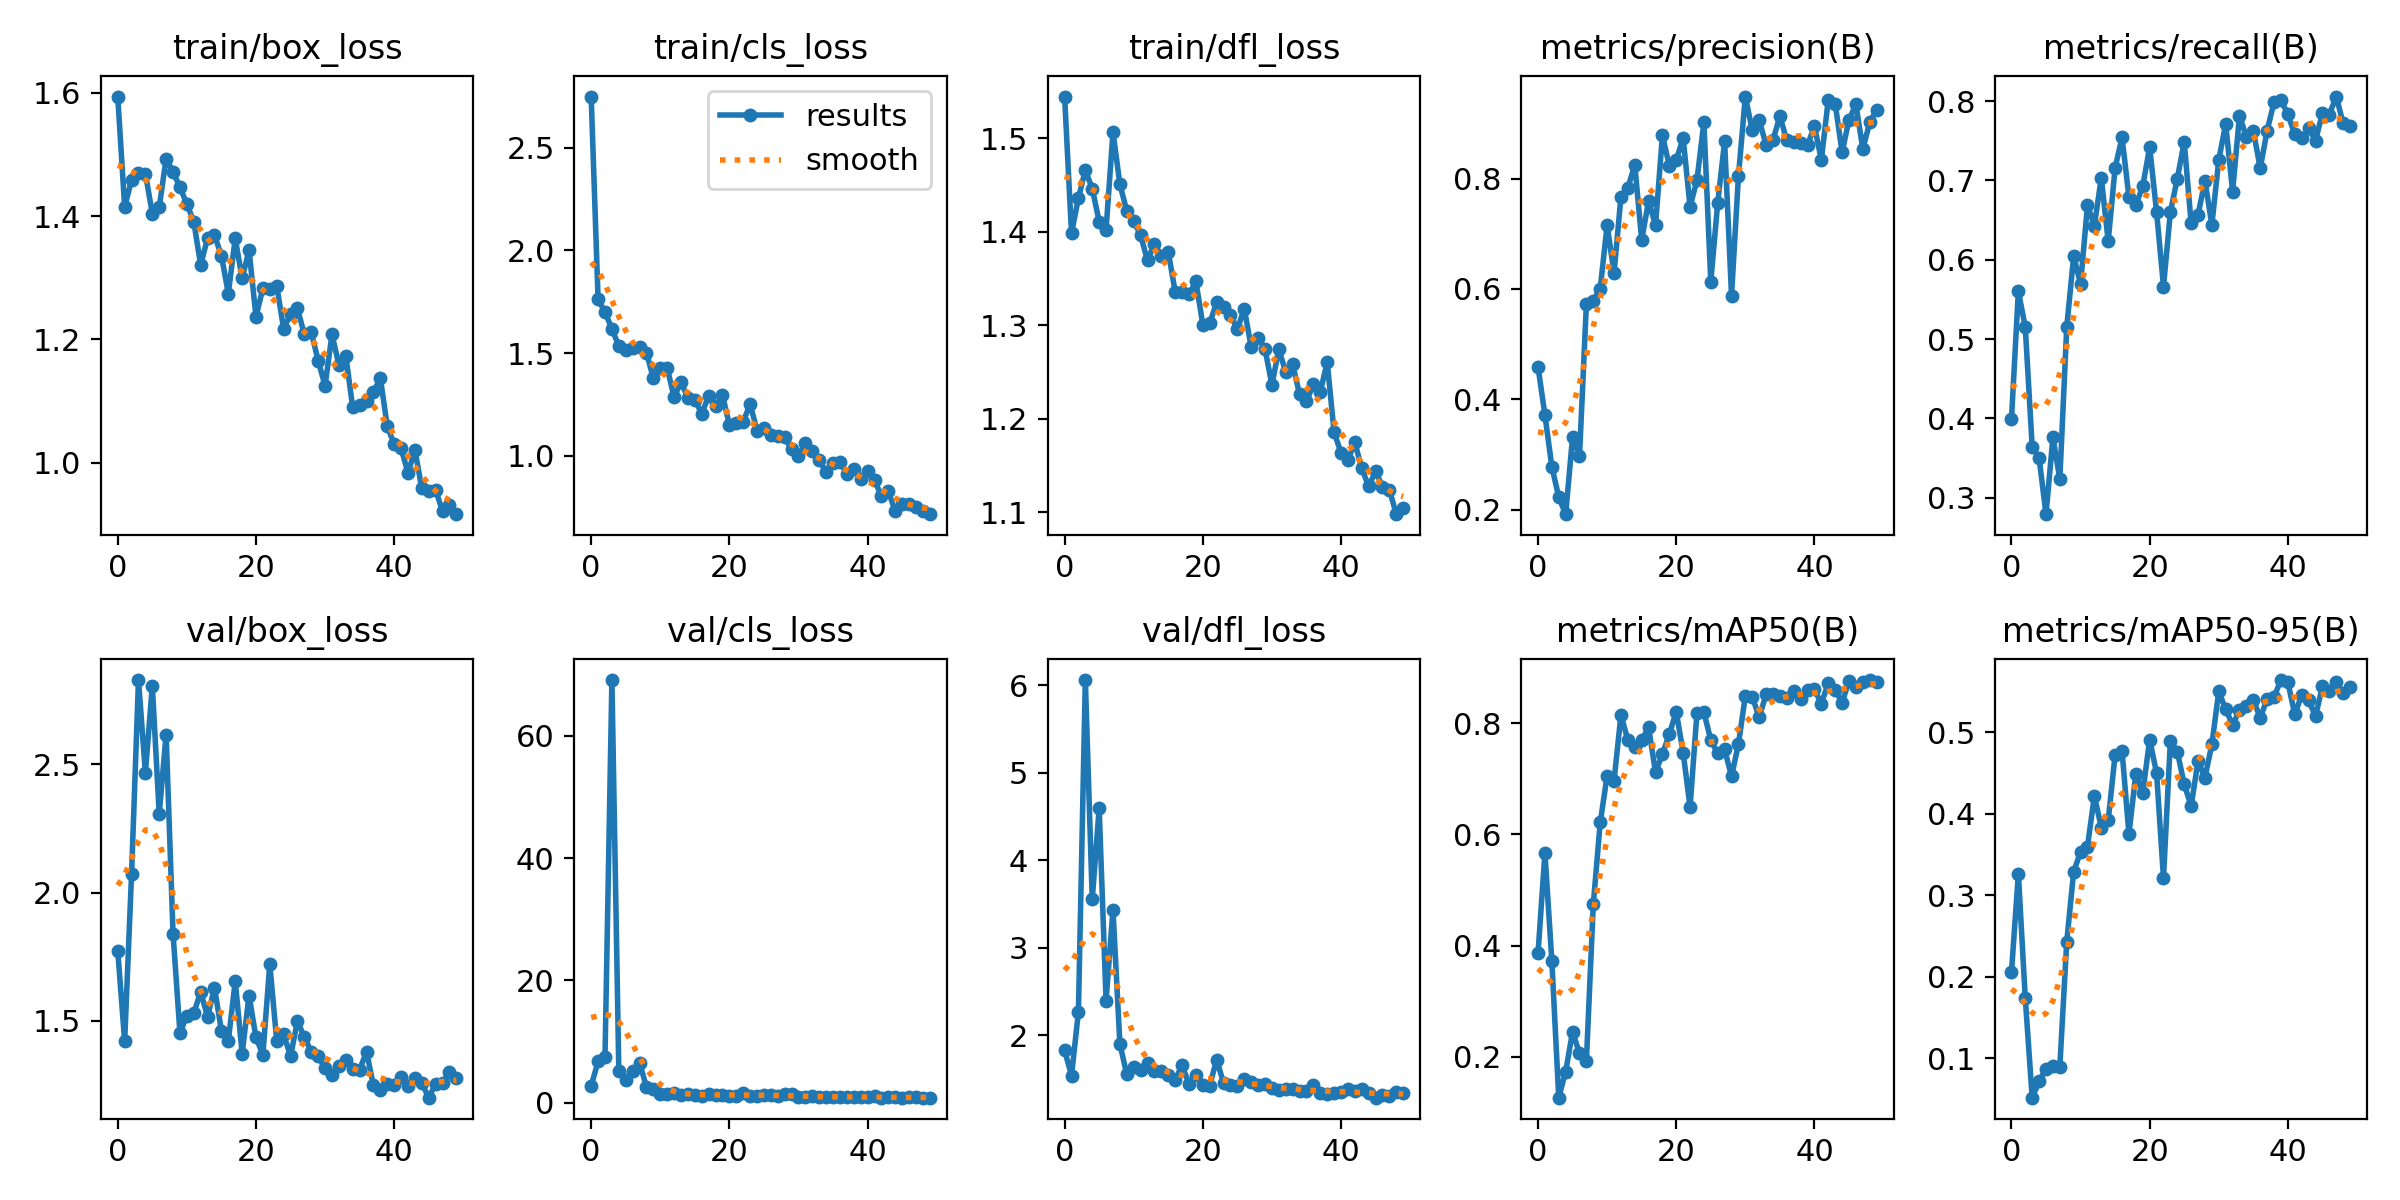

In [14]:
Image(filename='runs/detect/train/results.png', width=600)

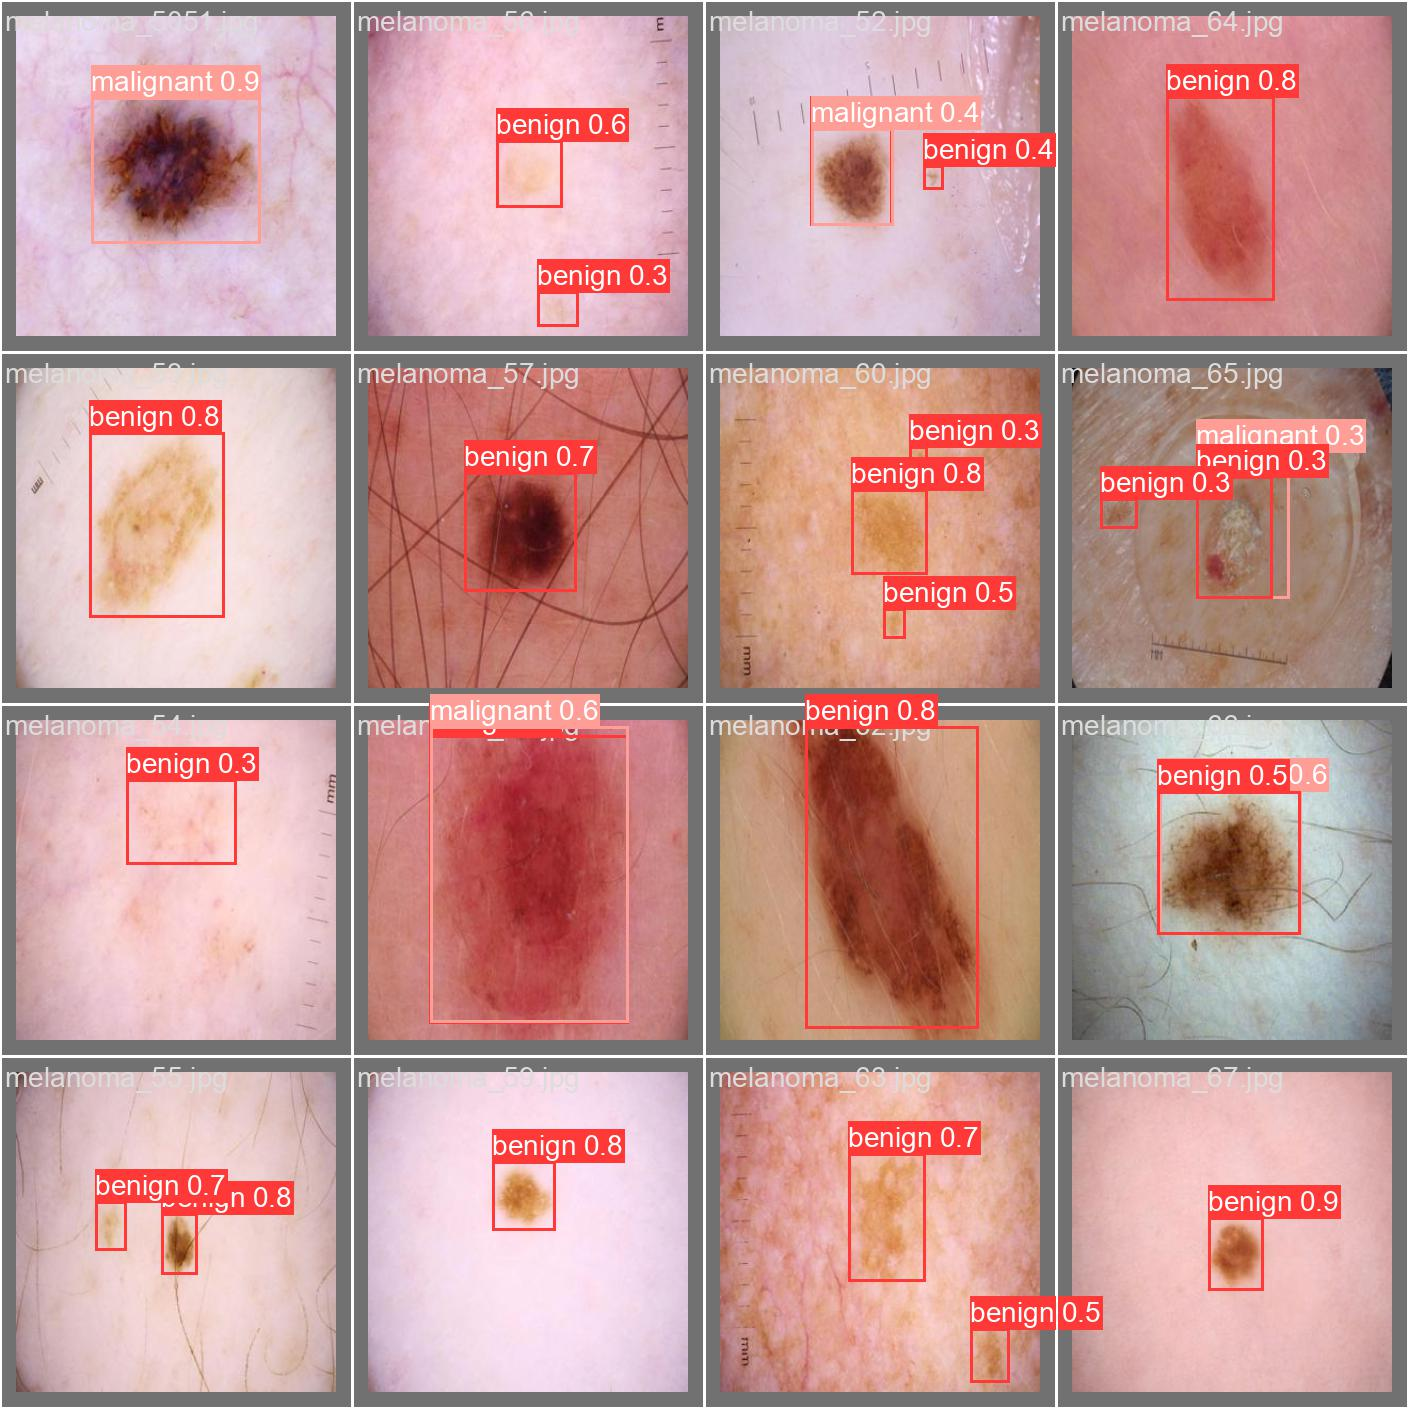

In [13]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)


## Validate Custom Model

In [15]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.59it/s]
                   all         40         57      0.863        0.8      0.861      0.565
                benign         40         35      0.883      0.645      0.774      0.439
             malignant         40         22      0.843      0.955      0.947      0.692
Speed: 1.9ms preprocess, 20.2ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/val


## Inference with Custom Model - test

In [16]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.0.139 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/20 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/melanoma_5071.jpg: 320x320 1 malignant, 8.9ms
image 2/20 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/melanoma_5072.jpg: 320x320 1 benign, 10.2ms
image 3/20 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/melanoma_5073.jpg: 320x320 1 malignant, 8.7ms
image 4/20 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/melanoma_5074.jpg: 320x320 1 malignant, 8.2ms
image 5/20 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/melanoma_5075.jpg: 320x320 2 malignants, 8.6ms
image 6/20 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/melanoma_5076.jpg: 320x320 1 malignant, 8.4ms
image 7/20 /content/drive/MyDrive/Colab Notebooks/YOLOv8/data/test/images/melanoma_5077.jpg: 320x320 2 malignants, 8.7ms
imag

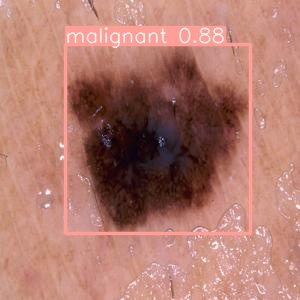

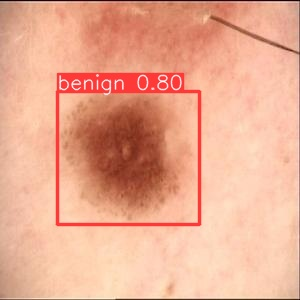

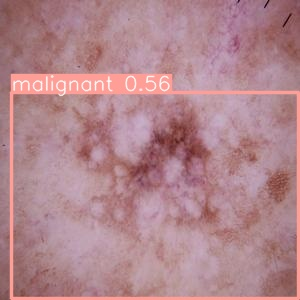

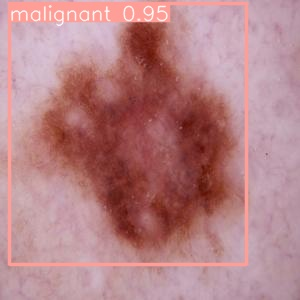

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:4]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Conclusiones:

* Para todas las imágenes, el clasificador tuvo una precisión de 0.863, un recall de 0.8, un mAP50 de 0.861 y un mAP50-95 de 0.565. Esto significa que el clasificador fue bastante preciso y completo para identificar las imágenes correctamente, pero tuvo más dificultad para ajustar las cajas delimitadoras con alta precisión.

* Para las imágenes benignas, el clasificador tuvo una precisión de 0.883, un recall de 0.645, un mAP50 de 0.774 y un mAP50-95 de 0.439. Esto significa que el clasificador fue muy preciso para identificar las imágenes benignas, pero no tan completo, ya que se perdió algunas de ellas. Además, tuvo problemas para ajustar las cajas delimitadoras con alta precisión para esta categoría.

* Para las imágenes malignas, el clasificador tuvo una precisión de 0.843, un recall de 0.955, un mAP50 de 0.947 y un mAP50-95 de 0.692. Esto significa que el clasificador fue muy completo para identificar las imágenes malignas, pero no tan preciso, ya que clasificó algunas imágenes benignas como malignas. Sin embargo, tuvo un mejor rendimiento para ajustar las cajas delimitadoras con alta precisión para esta categoría.

## export model